Pratik Dhameliya(19131969)

# Problem 1

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression


## TASK 1

In [39]:
#Read the meta data
md_file = '/meta-data.md'
with open(md_file, 'r') as f:
    md_data = f.read()

print(md_data)
# a = a measure of the size of the orbit, and it is defined as the average distance between the object and the center of the orbit(sun).
# e = a measure of how elliptical the orbit is. It is defined as the ratio of the distance between the object and the center of the orbit at its farthest point (aphelion) to the distance between the object and the center of the orbit at its closest point (perihelion).
# i =  is typically measured in degrees, with a value of 0° indicating a perfectly equatorial orbit and a value of 90° indicating a perfectly polar orbit.
# H =  a measure of its intrinsic brightness, which is the amount of light it would emit if it were at a standard distance of 10 parsecs (about 32.6 light-years) away from us.
# albedo is a measure of its reflectivity, which is the amount of sunlight that is reflected by the object's surface, rather than being absorbed.

The file sbdb.csv is a standard CSV file. It contains information about small bodies in the solar system, obtained from the JPL/NASA Small-Body Database via
https://ssd.jpl.nasa.gov/tools/sbdb_query.html
with some minimal processing.
It may help to look up a few technical terms on wikipedia to understand this problem.
Each row describes one object. The columns of the file are:
full_name, string, name of the oject
a, float, semi-major axis of the approximate elliptical orbit of the object in astronomical units (AU)
e, float, eccentricity of the approximate elliptical orbit of the object
i, float, orbital inclination in degrees
H, float, absolute magnitude of the object, inverse logarithmic scale, lower means brighter (under some "standard astronomical conditions")
diameter, float, approximate diameter of the object in kilometers
albedo, float, albedo of the object
class, categorical, type of asteroid (see below for list of classes)
first_obs, date, day of first observation of the object

In [37]:
#load data file
data= pd.read_csv('/sbdb.csv')
data= (data[(data['a'] > 0)]).dropna()

#print first 5 rows of data
data.head()

,full_name,a,e,i,H,diameter,albedo,class,first_obs
0,1 Ceres (A801 AA),2.767,0.0792,10.59,3.34,939.400,0.0900,MBA,1995-01-05
1,2 Pallas (A802 FA),2.770,0.2304,34.92,4.12,513.000,0.1550,MBA,1804-08-27
2,3 Juno (A804 RA),2.670,0.2561,12.99,5.18,246.596,0.2140,MBA,1804-10-17
3,4 Vesta (A807 FA),2.361,0.0900,7.14,3.25,525.400,0.4228,MBA,1950-09-23
4,5 Astraea (A845 XA),2.576,0.1873,5.36,6.99,106.699,0.2740,MBA,1845-12-15


In [40]:
# print datt type of each columns
print(data.dtypes)

full_name     object
a            float64
e            float64
i            float64
H            float64
diameter     float64
albedo       float64
class         object
first_obs     object
dtype: object


In [41]:
#Conver 'first obs' to datetime
data['first_obs'] = pd.to_datetime(data['first_obs'], errors='coerce')

# Convert 'class' to category
data['class'] = data['class'].astype('category')

# Verify the changes
print(data.dtypes)

full_name            object
a                   float64
e                   float64
i                   float64
H                   float64
diameter            float64
albedo              float64
class              category
first_obs    datetime64[ns]
dtype: object


## TASK 2

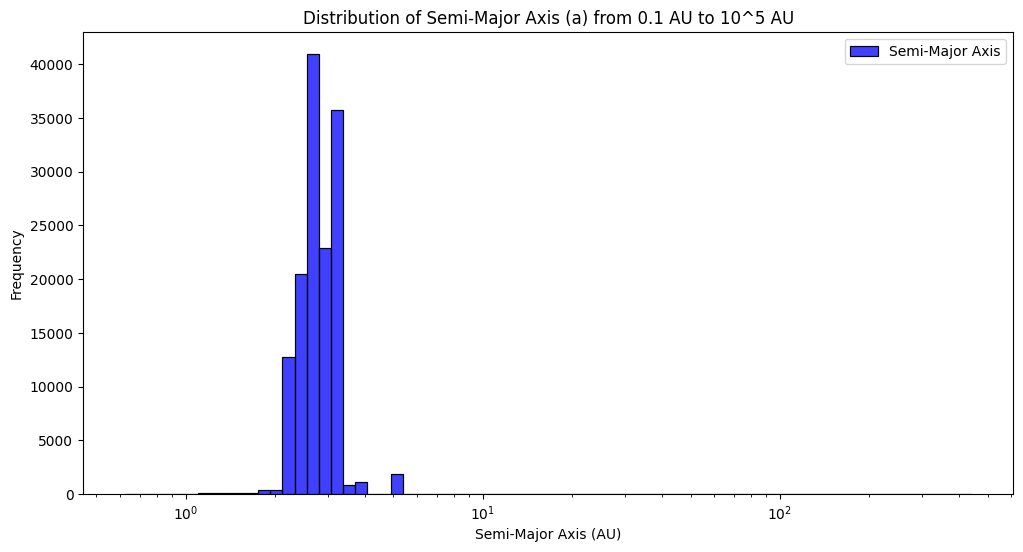

In [42]:
# Filter 'a' within the range 0.1 AU to 10^5 AU and drop NAN values otherwise for 'e' kde is getting error while counting variance
filtered_data_a = (data[(data['a'] >= 0.1) & (data['a'] <= 10**5)])

# Plot the distribution of 'a'
plt.figure(figsize=(12, 6))
sns.histplot(filtered_data_a['a'], bins=70, kde=False, color='blue', log_scale=True)
plt.xscale('log')  # Log scale on x-axis for better visualization of wide range
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Frequency')
plt.title('Distribution of Semi-Major Axis (a) from 0.1 AU to 10^5 AU')
plt.legend(['Semi-Major Axis'])
plt.show()



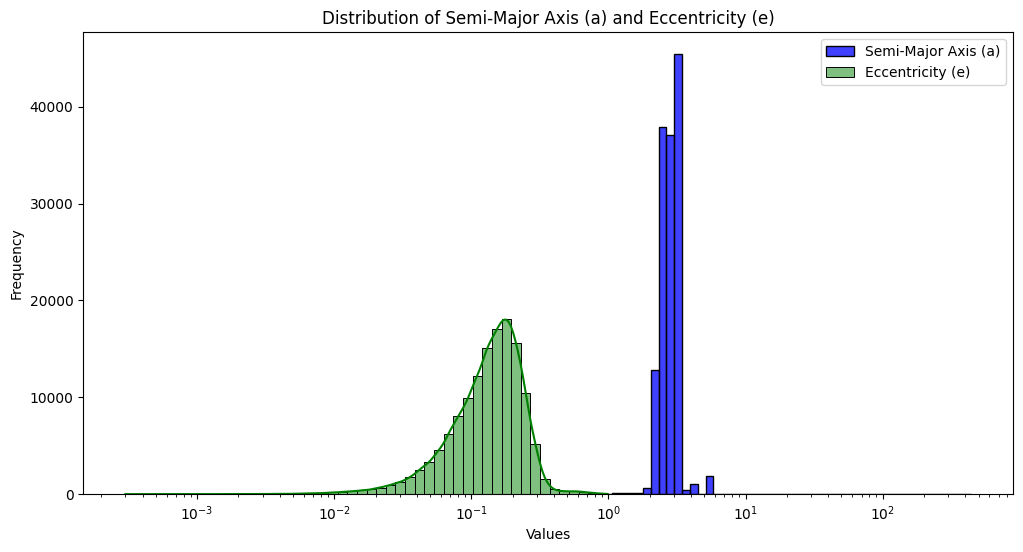

In [43]:
plt.figure(figsize=(12, 6))

# Plot for column 'a'
sns.histplot(filtered_data_a['a'], bins=50, kde=False, color='blue', label='Semi-Major Axis (a)', log_scale=True)
# Plot for column 'e'
sns.histplot(filtered_data_a['e'], bins=50, kde=True, color='green', label='Eccentricity (e)', log_scale=True)

plt.xscale('log')  # Log scale on x-axis for better visualization of wide range
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Semi-Major Axis (a) and Eccentricity (e)')
plt.legend()
plt.show()


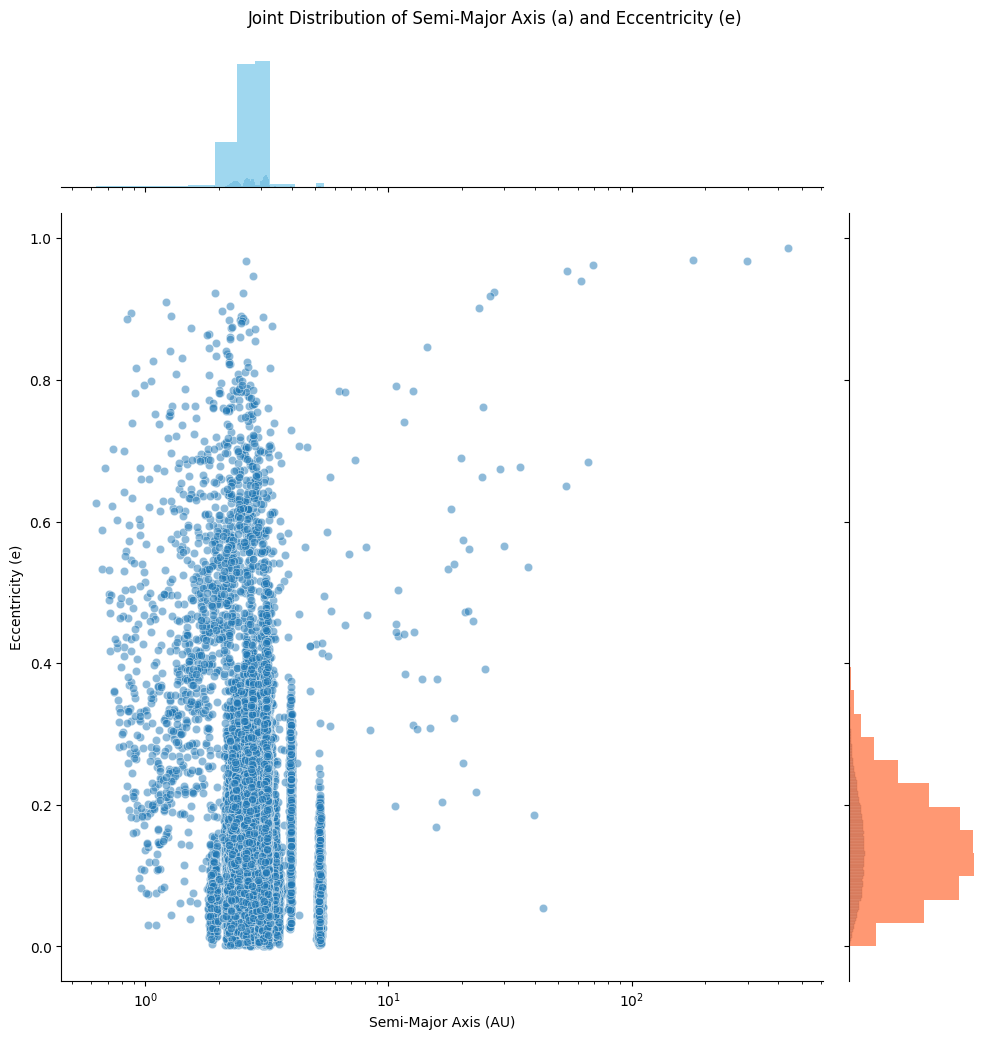

In [62]:
# Create the joint plot for 'a' and 'e'
g = sns.jointplot(x='a', y='e', data=filtered_data_a, kind='scatter', alpha=0.5, height=10)

# Set log scale for 'a' on the x-axis
g.ax_joint.set_xscale('log')

# Customize the marginal histogram for 'a' (x-axis)
g.ax_marg_x.hist(filtered_data_a['a'], bins=1000, color='skyblue', alpha=0.8)
g.ax_marg_x.set_xscale('log')

# Customize the marginal histogram for 'e' (y-axis)
g.ax_marg_y.hist(filtered_data_a['e'], bins=30, orientation="horizontal", color='coral', alpha=0.8)

# Set the labels and title
g.set_axis_labels('Semi-Major Axis (AU)', 'Eccentricity (e)')
plt.suptitle('Joint Distribution of Semi-Major Axis (a) and Eccentricity (e)', y=1.03)

plt.show()


## TASK 3

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

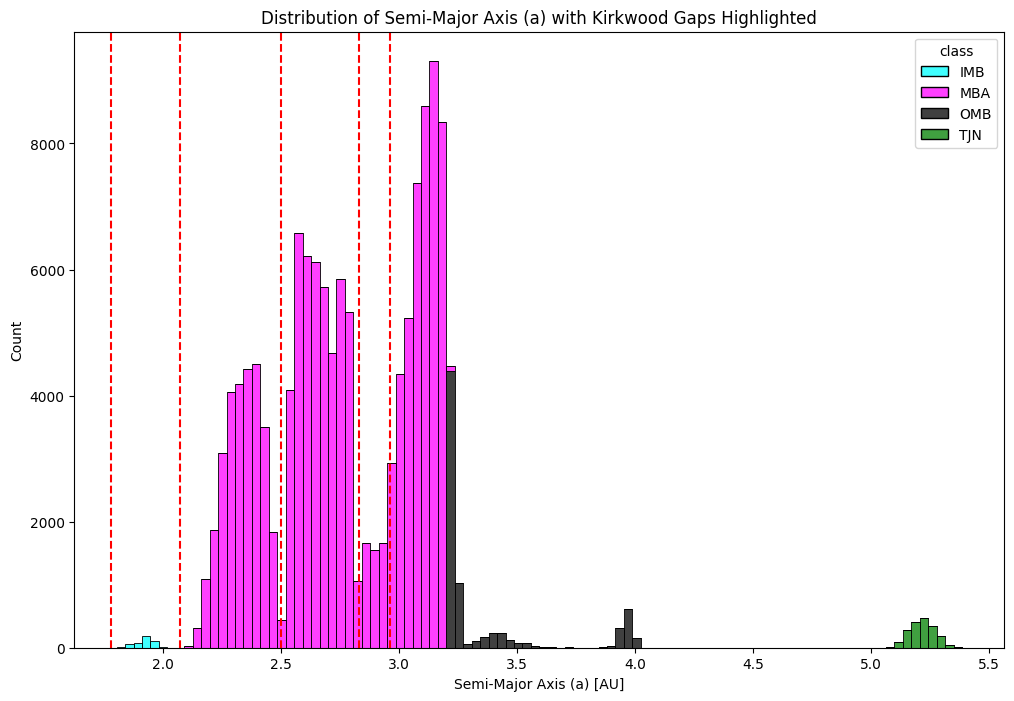

In [45]:
# We'll filter 'a' in the range 1 to 6 AU and consider only ['IMB', 'MBA', 'OMB', 'TJN'] classes
filtered_data_a_class = (data[(data['a'] >= 1) & (data['a'] <= 6) & (data['class'].isin(['IMB', 'MBA', 'OMB', 'TJN']))]).dropna()

# Remove unused categories from the 'class' column to get proper legened otherwise add all categories in legened
filtered_data_a_class['class'] = filtered_data_a_class['class'].cat.remove_unused_categories()

custom_palette = ['cyan', 'magenta', 'black', 'green']
# Plot the distribution of 'a', colored by asteroid classes
plt.figure(figsize=(12, 8))
sns.histplot(data=filtered_data_a_class, x='a', hue='class', multiple='stack', bins=100, palette=custom_palette)

# Define the Kirkwood gaps (the resonances)
kirkwood_gaps = [1.78, 2.07, 2.50, 2.83, 2.96]
# Highlight the Kirkwood gaps by drawing vertical lines
for gap in kirkwood_gaps:
    plt.axvline(x=gap, color='red', linestyle='--')

# Label the plot
plt.xlabel('Semi-Major Axis (a) [AU]')
plt.ylabel('Count')
plt.title('Distribution of Semi-Major Axis (a) with Kirkwood Gaps Highlighted')


# Display the plot
plt.show()


## TASK 4

In [46]:
# Filter rows where 'diameter', 'albedo', and 'H' are valid (non-NaN)
filtered_data_Hda = data[['diameter', 'albedo', 'H']].copy()

# Check for NaN values in the 'albedo', 'diameter', and 'H' columns
nan_albedo = filtered_data_Hda['albedo'].isna().sum()
nan_diameter = filtered_data_Hda['diameter'].isna().sum()
nan_H = filtered_data_Hda['H'].isna().sum()

# Print the results
print(f"Number of NaN values in 'albedo': {nan_albedo}")
print(f"Number of NaN values in 'diameter': {nan_diameter}")
print(f"Number of NaN values in 'H': {nan_H}")


Number of NaN values in 'albedo': 0
Number of NaN values in 'diameter': 0
Number of NaN values in 'H': 0


## TASK 5

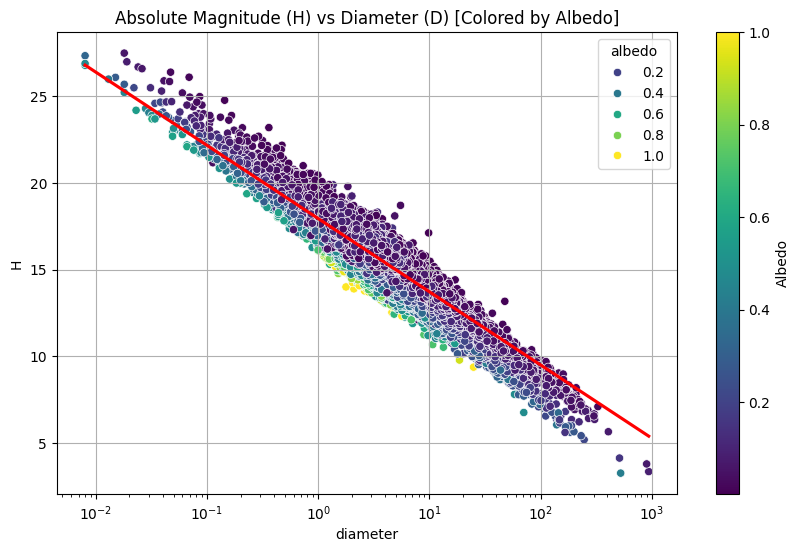

In [47]:
# Chart 1: H vs Diameter (grouped by different albedo ranges)
plt.figure(figsize=(10, 6))
scatter1 = sns.scatterplot(x='diameter', y='H', hue='albedo', data=filtered_data_Hda, palette='viridis')
plt.xscale('log')  # Logarithmic scale for diameter
plt.xlabel('Diameter (D) [km]')
plt.ylabel('Absolute Magnitude (H)')
plt.title('Absolute Magnitude (H) vs Diameter (D) [Colored by Albedo]')
plt.grid(True)

# Add regression line (without color distinction by albedo)
sns.regplot(x='diameter', y='H', data=filtered_data_Hda, scatter=False, color='red', logx=True)


# albedo_values = [0.2,0.4,0.6,0.8]
# for albedo_value in albedo_values:
#    subset = filtered_data_Hda[filtered_data_Hda['albedo'] == albedo_value]
#    sns.regplot(x='diameter', y='H', data=subset, scatter=False, logx=True, label=f'Albedo {albedo_value:.2f}')


# Create a colorbar based on the scatter plot and assign it to the figure's axis
norm = plt.Normalize(filtered_data_Hda['albedo'].min(), filtered_data_Hda['albedo'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), label='Albedo')  # Assign colorbar to the current axes

plt.show()



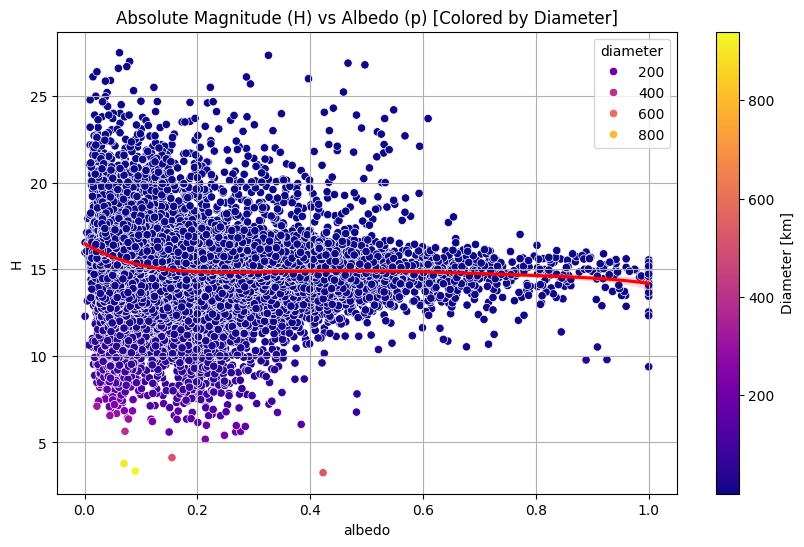

In [48]:

# Chart 2: H vs Albedo (grouped by different diameter ranges)
plt.figure(figsize=(10, 6))
scatter2 = sns.scatterplot(x='albedo', y='H', hue='diameter', data=filtered_data_Hda, palette='plasma')

plt.xlabel('Albedo (p)')
plt.ylabel('Absolute Magnitude (H)')
plt.title('Absolute Magnitude (H) vs Albedo (p) [Colored by Diameter]')
plt.grid(True)

sns.regplot(x='albedo', y='H', data=filtered_data_Hda, scatter=False, color='red', logx=False,order = 5)

# Create a colorbar based on the second scatter plot and assign it to the figure's axis
norm = plt.Normalize(filtered_data_Hda['diameter'].min(), filtered_data_Hda['diameter'].max())
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), label='Diameter [km]')  # Assign colorbar to the current axes

plt.show()

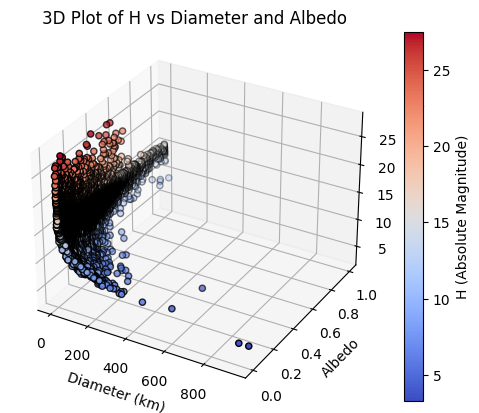

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data using scatter instead of plot, and add color based on H values
scatter = ax.scatter(filtered_data_Hda['diameter'], filtered_data_Hda['albedo'], filtered_data_Hda['H'],
                     c=filtered_data_Hda['H'], cmap='coolwarm', edgecolor='k')

# Add color bar for reference
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('H (Absolute Magnitude)')

# Set labels and title
ax.set_xlabel('Diameter (km)')
ax.set_ylabel('Albedo')
ax.set_zlabel('H (Absolute Magnitude)')
ax.set_title('3D Plot of H vs Diameter and Albedo')

# Show the plot
plt.show()


From [Wikipedia](https://en.wikipedia.org/wiki/Albedo), I got the formula:

$ A = \left( \frac{1329 \times 10^{-H/5}}{D} \right)^{2} $

Next, I calculate the albedo and plot the real versus calculated values.


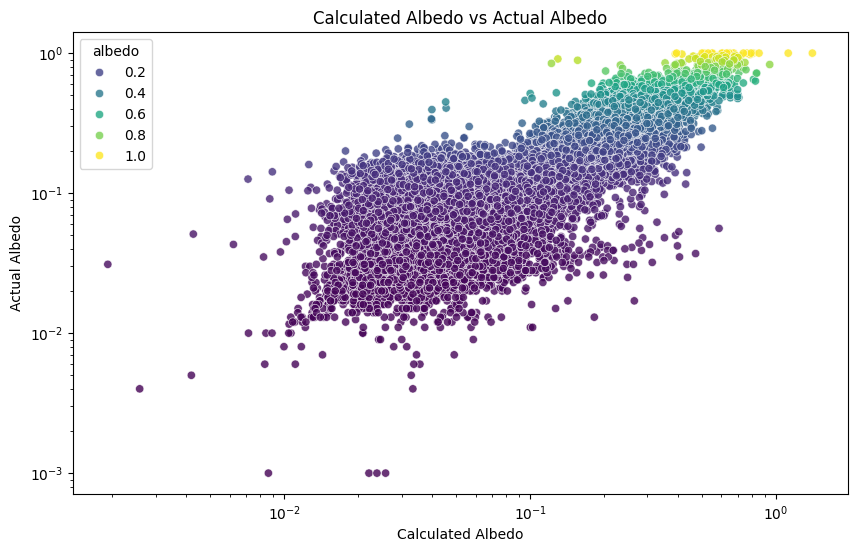

In [50]:
# Calculate albedo from the formula
filtered_data_Hda['calculated_albedo'] = ((1329 * (10 ** (-filtered_data_Hda['H'] / 5))) / filtered_data_Hda['diameter']) ** 2

# Scatter plot of calculated albedo vs actual albedo
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=filtered_data_Hda['calculated_albedo'],
    y=filtered_data_Hda['albedo'],
    hue=filtered_data_Hda['albedo'],
    palette='viridis',
    alpha=0.8
)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Calculated Albedo')
plt.ylabel('Actual Albedo')
plt.title('Calculated Albedo vs Actual Albedo')
plt.show()

## TASK 6

In [51]:
# Convert 'first_obs' to datetime and drop any rows with missing values in relevant columns
filtered_data_Hfa = data.dropna(subset=['first_obs', 'H', 'a', 'class'])

# Separate the TJN class
tjn_data = filtered_data_Hfa[filtered_data_Hfa['class'] == 'TJN']

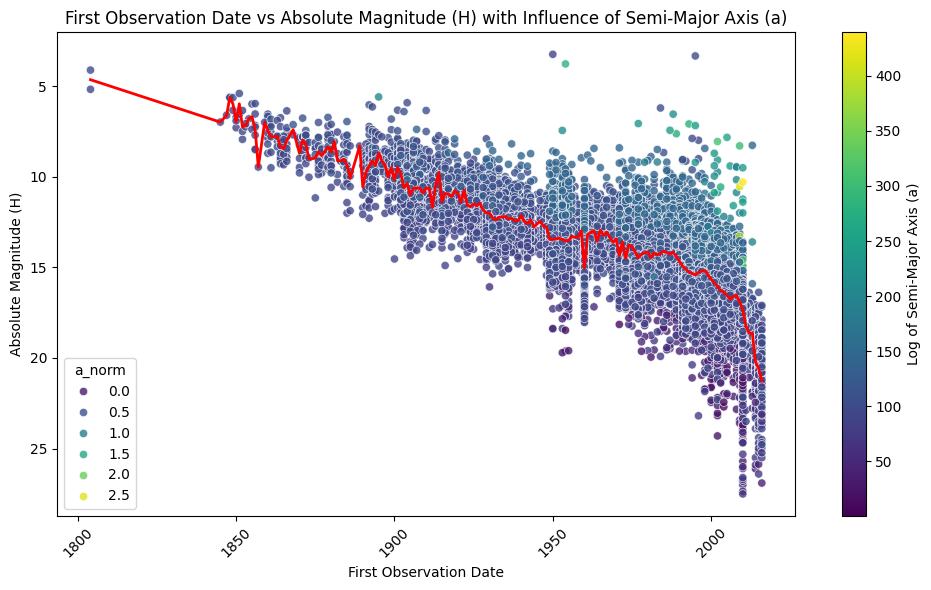

In [60]:
filtered_data_Hfa = filtered_data_Hfa[filtered_data_Hfa['a'] > 0].copy()

# Normalize the 'a' values for better color mapping using log transformation
filtered_data_Hfa['a_norm'] = np.log10(filtered_data_Hfa['a'])  # Log transformation for better spread in colors


# Extract the year from 'first_obs' and create a new column 'year'
filtered_data_Hfa['year'] = filtered_data_Hfa['first_obs'].dt.year

# Group by 'year' and calculate the average of 'H'
average_H_per_year = filtered_data_Hfa.groupby('year')['H'].mean().reset_index()

# Plot the scatter plot with color mapped to normalized 'a' values
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x=filtered_data_Hfa['year'],
    y=filtered_data_Hfa['H'],
    hue=filtered_data_Hfa['a_norm'],  # Use normalized 'a' values for better color distinction
    palette='viridis',
    alpha=0.8,
    edgecolor='white',  # Set white border around scatter points
    linewidth=0.5  # Optionally adjust border width
)
plt.plot(average_H_per_year['year'], average_H_per_year['H'], color='red', linestyle='-', linewidth=2)


# Invert y-axis for absolute magnitude
plt.gca().invert_yaxis()

# Set labels and title
plt.xlabel('First Observation Date')
plt.ylabel('Absolute Magnitude (H)')
plt.title('First Observation Date vs Absolute Magnitude (H) with Influence of Semi-Major Axis (a)')

# Customize the legend with a color bar
norm = plt.Normalize(vmin=np.min(filtered_data_Hfa['a']), vmax=np.max(filtered_data_Hfa['a']))
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

# Explicitly define the axes for the colorbar to avoid deprecation warning
plt.colorbar(sm, ax=plt.gca(), label='Log of Semi-Major Axis (a)')  # Add color bar for semi-major axis

plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

1. **Influence of Semi-Major Axis (a)**:
* The color of the scatter points represents the log of the semi-major axis (𝑎).
* Larger semi-major axes (green to yellow points) are predominantly observed in more recent years, around and after the 1960s. This shows that modern technology allowed the discovery of more distant objects (which tend to have larger orbits).
* Smaller semi-major axes (blue to purple points) dominate observations made earlier, indicating that early observations were more concentrated on nearby objects with smaller orbits.
* Post-1960s, a wider range of semi-major axis values (both large and small) is evident. This suggests that modern observational capabilities extended to both nearby and distant objects.
2. **Key Insights**:
* Early Observations (before 1900): Focus on bright, nearby objects (low H, small a).
* Mid 20th Century: Introduction of a wider variety of objects with increasing semi-major axes and fainter objects.
* Modern Era (Post-1960s): Discoveries span across a broad range of distances (both large and small semi-major axes), with a general trend toward detecting smaller, fainter objects (higher H values).

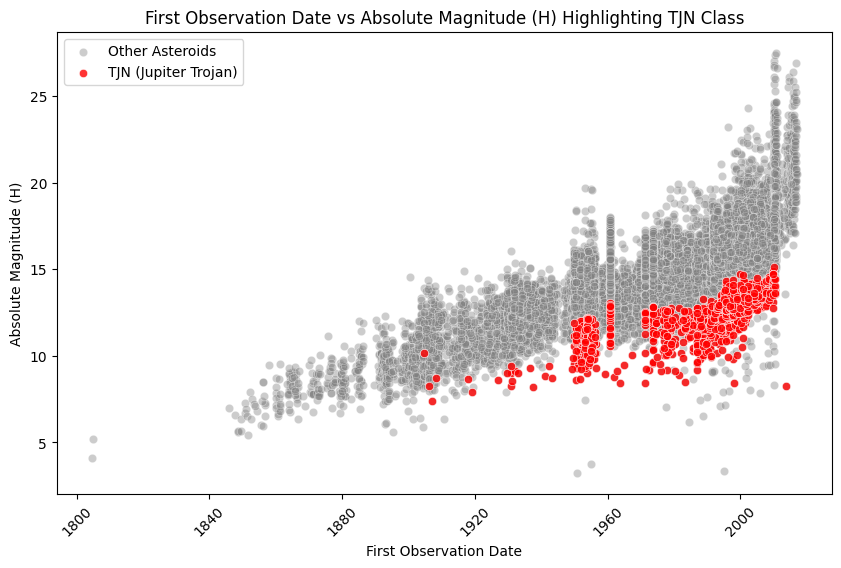

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_data_Hfa['first_obs'], y=filtered_data_Hfa['H'], color='gray', alpha=0.4, label='Other Asteroids')
sns.scatterplot(x=tjn_data['first_obs'], y=tjn_data['H'], color='red', alpha=0.8, label='TJN (Jupiter Trojan)')
plt.gca()  # Invert y-axis as lower H means brighter
plt.xlabel('First Observation Date')
plt.ylabel('Absolute Magnitude (H)')
plt.title('First Observation Date vs Absolute Magnitude (H) Highlighting TJN Class')
plt.legend()
plt.xticks(rotation=45)
plt.show()
